In [1]:
#Importing Required Dependencies
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from config import g_key
import gmaps
import os
import scipy.stats as stats
from scipy.stats import linregress

In [2]:
# Pulling in required data
composite_url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=compositepars'
api_key = "&apikey="

In [3]:
# Pulling necessary columns from NASA CSV and cleaning data with null values
nasa_original_df = pd.read_csv(composite_url)
nasa_filter_df = nasa_original_df[["fpl_hostname","fpl_letter","fpl_name","fpl_orbper","fpl_bmasse","fpl_rade","fpl_dens","fpl_eqt","fpl_insol","fst_optmag","fst_teff","fst_mass","fst_rad","fst_age"]]
nasa_clean_df = nasa_filter_df.dropna(how='any')
nasa_original_df.head()

,fpl_hostname,fpl_letter,fpl_name,fpl_discmethod,fpl_disc,fpl_controvflag,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,fpl_orbperlim,...,fst_meterr1,fst_meterr2,fst_metlim,fst_metratio,fst_metreflink,fst_age,fst_ageerr1,fst_ageerr2,fst_agelim,fst_agereflink
0,GJ 163,b,GJ 163 b,Radial Velocity,2013,0,8.63182,0.00155,-0.00155,0.0,...,0.1,-0.1,0.0,[Fe/H],<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,6.0,4.0,-4.0,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...
1,GJ 163,c,GJ 163 c,Radial Velocity,2013,0,25.63058,0.02550,-0.02550,0.0,...,0.1,-0.1,0.0,[Fe/H],<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,6.0,4.0,-4.0,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...
2,GJ 163,d,GJ 163 d,Radial Velocity,2013,0,603.95116,7.55862,-7.55862,0.0,...,0.1,-0.1,0.0,[Fe/H],<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,6.0,4.0,-4.0,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...
3,GJ 179,b,GJ 179 b,Radial Velocity,2009,0,2288.00000,59.00000,-59.00000,0.0,...,0.1,-0.1,0.0,[Fe/H],<a refstr=HOWARD_ET_AL__2010 href=https://ui.a...,NaN,NaN,NaN,NaN,NaN
4,GJ 317,b,GJ 317 b,Radial Velocity,2007,0,695.66000,0.35500,-0.35500,0.0,...,0.2,-0.2,0.0,[Fe/H],<a refstr=ANGLADA_ESCUDE_ET_AL__2012 href=http...,5.0,NaN,NaN,0.0,<a refstr=ANGLADA_ESCUDE_ET_AL__2012 href=http...


In [4]:
# Creating Data Set for Year and Planet Name
nasa_year_df = nasa_original_df[["fpl_name","fpl_disc", "fpl_discmethod", "fst_dist"]]
nasa_year_df = nasa_year_df.rename(columns={"fpl_name": "Planet Name", "fpl_disc": "Year Discovered", "fpl_discmethod": "Discovery Method", 
                            "fst_dist": "Distance from Earth (Parsecs)"})
nasa_year_df.head()

,Planet Name,Year Discovered,Discovery Method,Distance from Earth (Parsecs)
0,GJ 163 b,2013,Radial Velocity,15.14
1,GJ 163 c,2013,Radial Velocity,15.14
2,GJ 163 d,2013,Radial Velocity,15.14
3,GJ 179 b,2009,Radial Velocity,12.36
4,GJ 317 b,2007,Radial Velocity,15.10


In [5]:
# Creating a dataset for number of planets discovered for each year
planet_counts = nasa_year_df.groupby(["Year Discovered"]).count()
planet_counts = planet_counts.drop(columns=["Discovery Method", "Distance from Earth (Parsecs)"]).loc["2010":"2020"]
planet_counts = planet_counts.rename(columns={"Planet Name": "Number of Planets"})
planet_counts

,Number of Planets
Year Discovered,
2010,97
2011,138
2012,139
2013,125
2014,871
2015,157
2016,1505
2017,153
2018,315


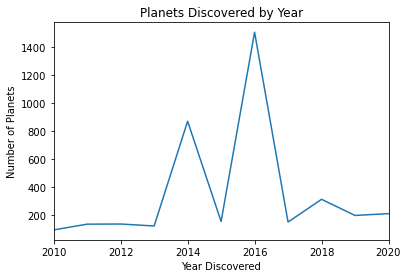

In [6]:
# Creating a line chart for number of planets discovered per year
planet_counts["Number of Planets"].plot()
plt.xlim([2010, 2020])
plt.ylabel("Number of Planets")
plt.title("Planets Discovered by Year")
plt.savefig("Year of Discovery")

# Austin to add text discussing the line graph

In [7]:
# Ryan to add text about my question

In [8]:
# Requesting confirmed exoplanets url for facility list
confirmed_url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
# Reading the URL as a CSV
facility = pd.read_csv(confirmed_url)
# Keeping only the required variables
facility_df = facility[['pl_name','pl_facility','st_dist']]

In [9]:
# Saving as data frame
df = pd.read_csv("facility_data_locations.csv")
df

,pl_facility,Lat,Long,Country
0,HATNet,36.601309,36.164228,Turkey
1,Kepler,28.282865,76.950927,India
2,Haute-Provence Observatory,43.934786,5.710468,France
3,W. M. Keck Observatory,19.826183,-155.474661,United States
4,Okayama Astrophysical Observatory,34.576269,133.594117,Japan
...,...,...,...,...
56,Atacama Large Millimeter Array (ALMA),-23.023168,-67.753780,Chile
57,Winer Observatory,31.665895,-110.601725,United States
58,Haleakala Observatory,20.708474,-156.256690,United States
59,KOINet,-34.580319,19.351710,South Africa


In [10]:
# Merging the two data sets on facility name
merged_facility_df = pd.merge(facility_df,df, on="pl_facility")
# Dropping any Null Values
merged_facility_clean = df = merged_facility_df.dropna(how='any')
merged_facility_clean

,pl_name,pl_facility,st_dist,Lat,Long,Country
0,HAT-P-19 b,HATNet,215.00,36.601309,36.164228,Turkey
1,HAT-P-20 b,HATNet,70.00,36.601309,36.164228,Turkey
2,HAT-P-21 b,HATNet,279.48,36.601309,36.164228,Turkey
3,HAT-P-22 b,HATNet,81.96,36.601309,36.164228,Turkey
4,HAT-P-23 b,HATNet,368.61,36.601309,36.164228,Turkey
...,...,...,...,...,...,...
4325,HD 97048 b,Atacama Large Millimeter Array (ALMA),185.00,-23.023168,-67.753780,Chile
4326,NY Vir c,Winer Observatory,551.99,31.665895,-110.601725,United States
4327,Wendelstein-1 b,Haleakala Observatory,307.98,20.708474,-156.256690,United States
4328,Wendelstein-2 b,Haleakala Observatory,574.40,20.708474,-156.256690,United States


In [11]:
# Grouping by facility name and then the variables of interest in order to save a data frame with just one observation
# for each facility
merged_facility_count = merged_facility_clean.groupby('pl_facility')['pl_name'].count()
merged_facility_lat = merged_facility_clean.groupby('pl_facility')['Lat'].mean()
merged_facility_long = merged_facility_clean.groupby('pl_facility')['Long'].mean()
group_df = pd.DataFrame({"Planet Count": merged_facility_count, "Lat": merged_facility_lat, "Long": merged_facility_long})
group_df

,Planet Count,Lat,Long
pl_facility,,,
Anglo-Australian Telescope,37,31.675295,-110.952129
Arecibo Observatory,3,18.346504,-66.752873
Atacama Large Millimeter Array (ALMA),1,-23.023168,-67.753780
Bohyunsan Optical Astronomical Observatory,17,36.164908,128.977035
Calar Alto Observatory,11,37.220936,-2.546736
Cerro Tololo Inter-American Observatory,2,-30.168746,-70.806311
European Southern Observatory,2,48.259719,11.670955
Fred Lawrence Whipple Observatory,6,31.675240,-110.951947
Gemini Observatory,9,19.824071,-155.468840


In [12]:
# Calling API key
gmaps.configure(api_key=g_key)

# Setting location and count
locations = group_df[["Lat", "Long"]]
weights = group_df["Planet Count"]

# Configuring map layout
figure_layout = {
    'width': "100%",
    'height': '400px',
    'padding': '1px',
}

fig = gmaps.figure(layout=figure_layout, center=(21, 4), zoom_level=2.0)
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights, dissipating=False)
fig.add_layer(heatmap_layer)

# Setting heatmap intensity and radius
heatmap_layer.max_intensity = 50
heatmap_layer.point_radius = 4

# Displaying heatmap
fig

Figure(layout=FigureLayout(height='400px', padding='1px', width='100%'))

Ryan to add text about heat map

In [13]:
# Creating a data frame for the top 5 facilities
top_five_facilities = group_df[group_df['Planet Count'] > 97]
top_five_facilities.reset_index()

,pl_facility,Planet Count,Lat,Long
0,Kepler,2391,28.282865,76.950927
1,La Silla Observatory,245,-29.255998,-70.738035
2,SuperWASP,113,36.001643,-78.938186
3,Transiting Exoplanet Survey Satellite (TESS),98,38.995042,-76.852344
4,W. M. Keck Observatory,175,19.826183,-155.474661


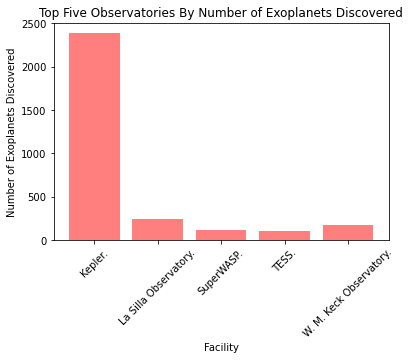

In [14]:
# Creating a bar chart for the top five facilities
Planet_Count = top_five_facilities['Planet Count']
x_axis = np.arange(len(Planet_Count))

plt.bar(x_axis,Planet_Count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Kepler.", "La Silla Observatory.", "SuperWASP.", "TESS.", "W. M. Keck Observatory."], size = 10, rotation=45)

# Labeling the bar chart
plt.xlabel("Facility")
plt.ylabel("Number of Exoplanets Discovered")
plt.title("Top Five Observatories By Number of Exoplanets Discovered")

plt.savefig("Observatories.png")

Ryan to add text about bar graph

In [15]:
# Creating a data frame for planets found by Country
merged_country_count = merged_facility_clean.groupby('Country')['pl_name'].count()
country_df = pd.DataFrame({"Planet Count": merged_country_count})
country_df

,Planet Count
Country,
Argentina,1
Australia,2
Chile,322
China,5
England,2
France,51
Germany,10
India,2391
Japan,23


In [16]:
# Creating a dataframe for top 5 countries
top_five_countries = country_df[country_df['Planet Count'] > 50]
top_five_countries

,Planet Count
Country,
Chile,322
France,51
India,2391
Turkey,60
United States,531


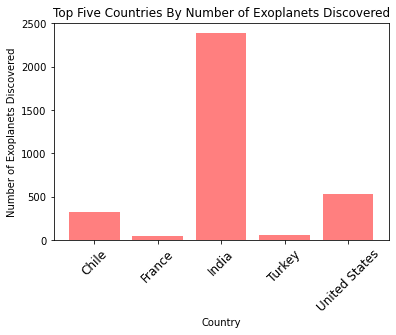

In [17]:
# Creating a bar chart for the top 5 countries
Planet_Count = top_five_countries['Planet Count']
x_axis = np.arange(len(Planet_Count))

plt.bar(x_axis,Planet_Count, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Chile", "France", "India", "Turkey", "United States"], size = 12,rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Exoplanets Discovered")
plt.title("Top Five Countries By Number of Exoplanets Discovered")

plt.savefig("Countries.png")

# Ryan to add text about bar graph

Greg to describe question 3 here.

In [18]:
# Taking a look at the data base
composite_url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=compositepars'
api_key = "&apikey="

# Printing url
print(composite_url + api_key)

# Pulling necessary columns from NASA CSV and cleaning data with null values
nasa_original_df = pd.read_csv(composite_url)
nasa_filter_df = nasa_original_df[["fpl_hostname","fpl_letter","fpl_name","fpl_orbper","fpl_bmasse","fpl_rade","fpl_dens","fpl_eqt","fpl_insol","fst_optmag","fst_teff","fst_mass","fst_rad","fst_age"]]
nasa_clean_df = nasa_filter_df.dropna(how='any')
nasa_clean_df.count()

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=compositepars&apikey=


fpl_hostname    332
fpl_letter      332
fpl_name        332
fpl_orbper      332
fpl_bmasse      332
fpl_rade        332
fpl_dens        332
fpl_eqt         332
fpl_insol       332
fst_optmag      332
fst_teff        332
fst_mass        332
fst_rad         332
fst_age         332
dtype: int64

In [19]:
# Pulling reference data in as a CSV and reading it as a DataFrame
phl = "PHL Habitable Exoplanets.csv"
phldf = pd.read_csv(phl)
phldf.head()

,Name,Type,Mass (ME),Radius (RE),Flux (SE),Teq (K),Period (days),Distance (ly),ESI
0,Teegarden's Star b,M-Warm Terran,1.05,NaN,1.15,264,4.9,12.0,0.95
1,TOI-700 d,M-Warm Terran,NaN,1.14,0.87,246,37.4,101.0,0.93
2,K2-72 e,M-Warm Terran,NaN,1.29,1.11,261,24.2,217.0,0.90
3,TRAPPIST-1 d,M-Warm Subterran,0.41,0.77,1.14,263,4.0,41.0,0.90
4,Kepler-1649 c,M-Warm Terran,NaN,1.06,0.75,237,19.5,301.0,0.90


In [20]:
# Converting Name column in reference data to a list for for loop check
phl_names = phldf["Name"].tolist()
print(phl_names)

["Teegarden's Star b", 'TOI-700 d', 'K2-72 e', 'TRAPPIST-1 d', 'Kepler-1649 c', 'Proxima Cen b', 'GJ 1061 d', 'GJ 1061 c', 'Ross 128 b', 'GJ 273 b', 'TRAPPIST-1 e', 'Kepler-442 b', 'Wolf 1061 c', 'GJ 667 C c', 'GJ 667 C f', 'Kepler-1229 b', 'TRAPPIST-1 f', 'Kepler-62 f', "Teegarden's Star c", 'Kepler-186 f', 'GJ 667 C e', 'tau Cet f', 'TRAPPIST-1 g', 'GJ 682 b', 'Kepler-452 b', 'Kepler-62 e', 'Kepler-1652 b', 'Kepler-1544 b', 'Kepler-296 e', 'Kepler-283 c', 'K2-296 b', 'Kepler-1410 b', 'K2-3 d', 'Kepler-1638 b', 'Kepler-296 f', 'Kepler-440 b', 'Kepler-705 b', 'Kepler-1653 b', 'GJ 832 c', 'Kepler-1606 b', 'Kepler-1090 b', 'Kepler-61 b', 'K2-18 b', 'Kepler-443 b', 'Kepler-1701 b', 'Kepler-22 b', 'LHS 1140 b', 'Kepler-1552 b', 'K2-9 b', 'Kepler-1540 b', 'GJ 180 c', 'Kepler-1632 b', 'Kepler-298 d', 'GJ 163 c', 'HD 40307 g', 'K2-288 B b', 'GJ 3293 d', 'GJ 229 A c', 'Kepler-174 d', 'GJ 357 d']


In [21]:
# Checking to see how many exoplanets in reference data remain in NASA data
phl_name_list = []
for x in phl_names:
    if not (nasa_clean_df.loc[nasa_clean_df["fpl_name"] == x].empty):
        phl_name_list.append(x)
print(len(phl_name_list))

22


In [22]:
# Merging reference data and NASA data
phl_esi_df = phldf[["Name","ESI"]]
nasa_merge_df = pd.merge(nasa_clean_df, phl_esi_df,left_on="fpl_name",right_on="Name",how="left")

# Pulling necessary columns from merged DF
nasa_clean_merge_df = nasa_merge_df[["fpl_hostname","fpl_name","fpl_orbper","fpl_bmasse","fpl_rade","fpl_dens","fpl_eqt","fpl_insol","fst_optmag","fst_teff","fst_mass","fst_rad","fst_age","ESI"]]
nasa_clean_merge_df.head(5)

,fpl_hostname,fpl_name,fpl_orbper,fpl_bmasse,fpl_rade,fpl_dens,fpl_eqt,fpl_insol,fst_optmag,fst_teff,fst_mass,fst_rad,fst_age,ESI
0,HAT-P-9,HAT-P-9 b,3.922811,238.05467,15.614,0.342,1540.0,931.000,12.297,6350.0,1.28,1.34,1.6,NaN
1,HAT-P-25,HAT-P-25 b,3.652815,180.84527,12.722,0.483,1182.0,325.000,13.190,5519.0,1.01,0.92,3.2,NaN
2,HAT-P-29,HAT-P-29 b,5.723190,279.69040,13.115,0.790,1271.0,433.000,11.900,6087.0,1.45,1.30,2.2,NaN
3,HAT-P-32,HAT-P-32 b,2.150008,216.12440,22.194,0.108,1836.0,1841.000,11.289,6001.0,1.13,1.37,2.7,NaN
4,Kepler-117,Kepler-117 b,18.795923,29.87500,8.059,0.300,984.0,157.541,14.247,6150.0,1.13,1.61,5.3,NaN


In [23]:
nasaphldf = nasa_clean_merge_df.rename(columns={"fpl_hostname":"Host Name", "fpl_name":"Exoplanet Name","fpl_orbper":"Orbital Period (days)","fpl_bmasse":"Planet Mass [Earth mass]","fpl_rade":"Planet Radius [Earth radii]","fpl_dens":"Planet Density (g/cm**3)","fpl_eqt":"Planet Equilibrium Temperature [K]","fpl_insol":"Insolation Flux [Earth flux]","fst_optmag":"Optical Magnitude [mag]","fst_teff":"Effective Temperature [K]","fst_mass":"Stellar Mass [Solar mass]","fst_rad":"Stellar Radius [Solar radii]","fst_age":"Stellar Age [Gyr]","ESI":"Earth Similarity Index (ESI)"})
nasaphldf

,Host Name,Exoplanet Name,Orbital Period (days),Planet Mass [Earth mass],Planet Radius [Earth radii],Planet Density (g/cm**3),Planet Equilibrium Temperature [K],Insolation Flux [Earth flux],Optical Magnitude [mag],Effective Temperature [K],Stellar Mass [Solar mass],Stellar Radius [Solar radii],Stellar Age [Gyr],Earth Similarity Index (ESI)
0,HAT-P-9,HAT-P-9 b,3.922811,238.05467,15.614,0.342,1540.0,931.000,12.297,6350.00,1.28,1.34,1.600,NaN
1,HAT-P-25,HAT-P-25 b,3.652815,180.84527,12.722,0.483,1182.0,325.000,13.190,5519.00,1.01,0.92,3.200,NaN
2,HAT-P-29,HAT-P-29 b,5.723190,279.69040,13.115,0.790,1271.0,433.000,11.900,6087.00,1.45,1.30,2.200,NaN
3,HAT-P-32,HAT-P-32 b,2.150008,216.12440,22.194,0.108,1836.0,1841.000,11.289,6001.00,1.13,1.37,2.700,NaN
4,Kepler-117,Kepler-117 b,18.795923,29.87500,8.059,0.300,984.0,157.541,14.247,6150.00,1.13,1.61,5.300,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,HATS-38,HATS-38 b,4.375021,23.51942,6.882,0.403,1294.0,464.700,12.411,5732.00,0.89,1.10,11.890,NaN
328,HATS-59,HATS-59 b,5.416081,256.17098,12.621,0.700,1128.0,269.000,13.951,5670.00,1.04,1.04,4.300,NaN
329,HATS-59,HATS-59 c,1422.000000,4036.44100,12.300,11.900,176.0,0.159,13.951,5670.00,1.04,1.04,4.300,NaN
330,V1298 Tau,V1298 Tau b,24.139600,74.90000,10.270,0.380,677.0,35.000,10.116,4962.28,1.10,1.34,0.023,NaN


In [24]:
# Gathering data to be used as proven potential habitable planets by taking 5 major factors and calculating their bounds

# Individually cleaning columns to make the most out of the data that is given
massphl = phldf["Mass (ME)"].dropna(how='any')
radiusphl = phldf["Radius (RE)"].dropna(how='any')

# Converting other 3 columns to be used without cleaning since all data is given
fluxphl = phldf["Flux (SE)"]
teqphl = phldf["Teq (K)"]
orbitphl = phldf["Period (days)"]

# Adding all 5 columns to a variable for for loop and saving list with column names
phlstats = [massphl,radiusphl,fluxphl,teqphl,orbitphl]
phlnames = ["Mass (ME)","Radius (RE)","Flux (SE)","Teq (K)","Period (days)"]

In [25]:
# Calculating the standard deviations for each column to use as guidelines to find potentially habitable planets
# Saving low and high deviations to list to use for for loop later on
index = 0
lowsd = []
highsd = []
for x in phlstats:
    mean = np.mean(x)
    sd = np.std(x)
    print(f"For {phlnames[index]}, roughly 95% of the data is between {round(mean-2*sd,3)} and {round(mean+2*sd,3)}.")
    lowsd.append(mean-2*sd)
    highsd.append(mean+2*sd)
    index += 1
    
print("Planets outside of these deviation limits will not be appended to the potential habitable planet list.")

For Mass (ME), roughly 95% of the data is between -1.395 and 8.812.
For Radius (RE), roughly 95% of the data is between 0.828 and 2.752.
For Flux (SE), roughly 95% of the data is between 0.146 and 1.673.
For Teq (K), roughly 95% of the data is between 184.756 and 300.944.
For Period (days), roughly 95% of the data is between -138.725 and 337.791.
Planets outside of these deviation limits will not be appended to the potential habitable planet list.


In [26]:
# Removing planets that have an ESI because they are already proven to be potentially habitable
rawnasadf = nasaphldf.loc[pd.isnull(nasaphldf['Earth Similarity Index (ESI)'])]
rawnasadf

,Host Name,Exoplanet Name,Orbital Period (days),Planet Mass [Earth mass],Planet Radius [Earth radii],Planet Density (g/cm**3),Planet Equilibrium Temperature [K],Insolation Flux [Earth flux],Optical Magnitude [mag],Effective Temperature [K],Stellar Mass [Solar mass],Stellar Radius [Solar radii],Stellar Age [Gyr],Earth Similarity Index (ESI)
0,HAT-P-9,HAT-P-9 b,3.922811,238.05467,15.614,0.342,1540.0,931.000,12.297,6350.00,1.28,1.34,1.600,NaN
1,HAT-P-25,HAT-P-25 b,3.652815,180.84527,12.722,0.483,1182.0,325.000,13.190,5519.00,1.01,0.92,3.200,NaN
2,HAT-P-29,HAT-P-29 b,5.723190,279.69040,13.115,0.790,1271.0,433.000,11.900,6087.00,1.45,1.30,2.200,NaN
3,HAT-P-32,HAT-P-32 b,2.150008,216.12440,22.194,0.108,1836.0,1841.000,11.289,6001.00,1.13,1.37,2.700,NaN
4,Kepler-117,Kepler-117 b,18.795923,29.87500,8.059,0.300,984.0,157.541,14.247,6150.00,1.13,1.61,5.300,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,HATS-38,HATS-38 b,4.375021,23.51942,6.882,0.403,1294.0,464.700,12.411,5732.00,0.89,1.10,11.890,NaN
328,HATS-59,HATS-59 b,5.416081,256.17098,12.621,0.700,1128.0,269.000,13.951,5670.00,1.04,1.04,4.300,NaN
329,HATS-59,HATS-59 c,1422.000000,4036.44100,12.300,11.900,176.0,0.159,13.951,5670.00,1.04,1.04,4.300,NaN
330,V1298 Tau,V1298 Tau b,24.139600,74.90000,10.270,0.380,677.0,35.000,10.116,4962.28,1.10,1.34,0.023,NaN


In [27]:
# Cleaning dataframe so it has only the data we are using
nasadf = rawnasadf[["Exoplanet Name","Planet Mass [Earth mass]","Planet Radius [Earth radii]","Insolation Flux [Earth flux]","Planet Equilibrium Temperature [K]","Orbital Period (days)"]]
nasadf

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
0,HAT-P-9 b,238.05467,15.614,931.000,1540.0,3.922811
1,HAT-P-25 b,180.84527,12.722,325.000,1182.0,3.652815
2,HAT-P-29 b,279.69040,13.115,433.000,1271.0,5.723190
3,HAT-P-32 b,216.12440,22.194,1841.000,1836.0,2.150008
4,Kepler-117 b,29.87500,8.059,157.541,984.0,18.795923
...,...,...,...,...,...,...
327,HATS-38 b,23.51942,6.882,464.700,1294.0,4.375021
328,HATS-59 b,256.17098,12.621,269.000,1128.0,5.416081
329,HATS-59 c,4036.44100,12.300,0.159,176.0,1422.000000
330,V1298 Tau b,74.90000,10.270,35.000,677.0,24.139600


In [28]:
# Finding the planets that meet the mass range provided by the standard deviations
massdf = nasadf.loc[(nasadf["Planet Mass [Earth mass]"] <= highsd[0]) & (nasadf["Planet Mass [Earth mass]"] >= lowsd[0])]
massdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
6,Kepler-120 b,8.50,2.15,42.692,576.0,6.312501
7,Kepler-120 c,2.96,1.53,16.625,455.0,12.794585
8,Kepler-125 b,6.21,2.37,33.184,594.0,4.164389
9,Kepler-186 b,1.24,1.07,37.372,579.0,3.886791
10,Kepler-186 c,2.10,1.25,13.980,470.0,7.267302


In [29]:
# Finding the planets that meet the radius range provided by the standard deviations
radiusdf = massdf.loc[(massdf["Planet Radius [Earth radii]"] <= highsd[1]) & (massdf["Planet Radius [Earth radii]"] >= lowsd[1])]
radiusdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
6,Kepler-120 b,8.50,2.15,42.692,576.0,6.312501
7,Kepler-120 c,2.96,1.53,16.625,455.0,12.794585
8,Kepler-125 b,6.21,2.37,33.184,594.0,4.164389
9,Kepler-186 b,1.24,1.07,37.372,579.0,3.886791
10,Kepler-186 c,2.10,1.25,13.980,470.0,7.267302


In [30]:
# Finding the planets that meet the flux range provided by the standard deviations
fluxdf = radiusdf.loc[(radiusdf["Insolation Flux [Earth flux]"] <= highsd[2]) & (radiusdf["Insolation Flux [Earth flux]"] >= lowsd[2])]
fluxdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
24,Kepler-155 c,5.65,2.24,1.280,286.0,52.661793
132,Kepler-235 e,5.56,2.22,1.330,306.0,46.183669
191,Kepler-1455 b,5.31,2.16,1.533,298.0,49.276764
202,Kepler-1512 b,1.76,1.18,1.600,322.0,20.359726


In [31]:
# Finding the planets that meet the temperature range provided by the standard deviations
teqdf = fluxdf.loc[(fluxdf["Planet Equilibrium Temperature [K]"] <= highsd[3]) & (fluxdf["Planet Equilibrium Temperature [K]"] >= lowsd[3])]
teqdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
24,Kepler-155 c,5.65,2.24,1.280,286.0,52.661793
191,Kepler-1455 b,5.31,2.16,1.533,298.0,49.276764


In [32]:
# Finding the planets that meet the orbit range provided by the standard deviations (or all conditions)
orbitdf = teqdf.loc[(teqdf["Orbital Period (days)"] <= highsd[4]) & (teqdf["Orbital Period (days)"] >= lowsd[4])]
orbitdf.head()

,Exoplanet Name,Planet Mass [Earth mass],Planet Radius [Earth radii],Insolation Flux [Earth flux],Planet Equilibrium Temperature [K],Orbital Period (days)
24,Kepler-155 c,5.65,2.24,1.280,286.0,52.661793
191,Kepler-1455 b,5.31,2.16,1.533,298.0,49.276764


In [33]:
# Generating for loop to see how many conditions an exoplanet meets and appending it to the proper list
cond0,cond1,cond2,cond3,cond4,cond5 = [],[],[],[],[],[]
for index, row in nasadf.iterrows():
    cond = 0
    if (row["Planet Mass [Earth mass]"] >= lowsd[0]) & (row["Planet Mass [Earth mass]"] <= highsd[0]):
        cond += 1
    if (row["Planet Radius [Earth radii]"] >= lowsd[1]) & (row["Planet Radius [Earth radii]"] <= highsd[1]):
        cond += 1
    if (row["Insolation Flux [Earth flux]"] >= lowsd[2]) & (row["Insolation Flux [Earth flux]"] <= highsd[2]):
        cond += 1
    if (row["Planet Equilibrium Temperature [K]"] >= lowsd[3]) & (row["Planet Equilibrium Temperature [K]"] <= highsd[3]):
        cond += 1
    if (row["Orbital Period (days)"] >= lowsd[4]) & (row["Orbital Period (days)"] <= highsd[4]):
        cond += 1
    if cond == 0:
        cond0.append(row["Exoplanet Name"])
    elif cond == 1:
        cond1.append(row["Exoplanet Name"])
    elif cond == 2:
        cond2.append(row["Exoplanet Name"])
    elif cond == 3:
        cond3.append(row["Exoplanet Name"])
    elif cond == 4:
        cond4.append(row["Exoplanet Name"])
    elif cond == 5:
        cond5.append(row["Exoplanet Name"])
        
totalcond = [len(cond0),len(cond1),len(cond2),len(cond3),len(cond4),len(cond5)]
print(totalcond)

[1, 149, 42, 111, 5, 2]


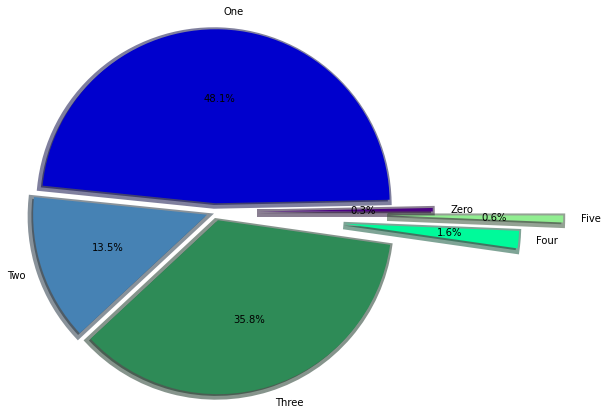

In [34]:
# Making a pie chart to represent the total number of conditions each exoplanet meets
labels = ["Zero","One","Two","Three","Four","Five"]
colors = ["indigo","mediumblue","steelblue","seagreen","mediumspringgreen","lightgreen"]
explode = (0.5,0.1,0.1,0.1,1.5,2)

# Plotting
plt.pie(totalcond,explode=explode,labels=labels,radius=2,colors=colors,autopct="%1.1f%%",shadow=True,wedgeprops={'linewidth':7.5})

# Saving figure
plt.savefig("Q3Figures/CondPie.png")

GREG TO ADD TEXT ON PIE CHART

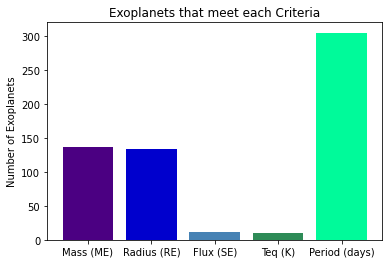

In [35]:
# Gathering number of rows for the number of exoplanets that meet each criteria
accuconddf = [
    (nasadf.loc[(nasadf["Planet Mass [Earth mass]"] <= highsd[0]) & (nasadf["Planet Mass [Earth mass]"] >= lowsd[0])]).shape[0],
    (nasadf.loc[(nasadf["Planet Radius [Earth radii]"] <= highsd[1]) & (nasadf["Planet Radius [Earth radii]"] >= lowsd[1])]).shape[0],
    (nasadf.loc[(nasadf["Insolation Flux [Earth flux]"] <= highsd[2]) & (nasadf["Insolation Flux [Earth flux]"] >= lowsd[2])]).shape[0],
    (nasadf.loc[(nasadf["Planet Equilibrium Temperature [K]"] <= highsd[3]) & (nasadf["Planet Equilibrium Temperature [K]"] >= lowsd[3])]).shape[0],
    (nasadf.loc[(nasadf["Orbital Period (days)"] <= highsd[4]) & (nasadf["Orbital Period (days)"] >= lowsd[4])]).shape[0]]

# Plotting
colors2 = ["indigo","mediumblue","steelblue","seagreen","mediumspringgreen"]
xaxis = np.arange(len(accuconddf))
plt.bar(xaxis,accuconddf,color=colors2)
tick_locations = [value for value in xaxis]
plt.xticks(tick_locations,phlnames)
plt.ylabel("Number of Exoplanets")
plt.title("Exoplanets that meet each Criteria")

# Saving figure
plt.savefig("Q3Figures/CondBar.png")

MICAH TO ADD TEXT FOR QUESTION 4

In [36]:
#Isolated the columns needed for the graphs
phl_esi_df = phldf[["Name","ESI"]]
graphs = pd.merge(nasa_filter_df, phl_esi_df,left_on="fpl_name",right_on="Name",how="left")

#Dropped null values to make sure all data was graphed as best as it could be
graphs2 = graphs[["fpl_hostname","fpl_name","fpl_orbper","fpl_bmasse","fpl_rade","fpl_dens","fpl_eqt","fpl_insol","fst_optmag","fst_teff","fst_mass","fst_rad","fst_age","ESI"]]
dropped = graphs2.dropna(subset = ['fpl_eqt' , 'ESI'])
dropped1 = graphs2.dropna(subset = ['fpl_insol' , 'ESI'])
dropped2 = graphs2.dropna(subset = ['fpl_bmasse' , 'ESI'])
dropped3 = graphs2.dropna(subset = ['fpl_rade' , 'ESI'])
dropped4 = graphs2.dropna(subset = ['fst_age' , 'ESI'])

In [37]:
#Defined plot linear to condense code for each scatter plot to call later.
def plot_linear(x_values, y_values, title, text_coor):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coor,fontsize=15,color="red")
    print(f"r-value:{rvalue**2}")
    plt.show()

r-value:0.0010782264078862925


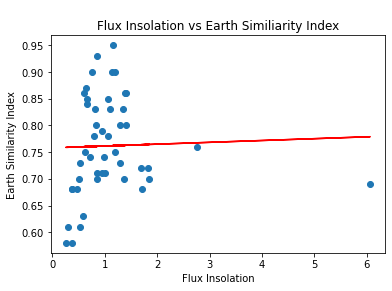

In [38]:
#Scatter plot 1
x_values = dropped1['fpl_insol']
y_values = dropped1['ESI']
plt.xlabel('Flux Insolation')
plt.ylabel('Earth Similarity Index')
plt.title('Flux Insolation vs Earth Similiarity Index')
plot_linear(x_values, y_values,'Max Temp',(1, 1))

r-value:0.026164170851190275


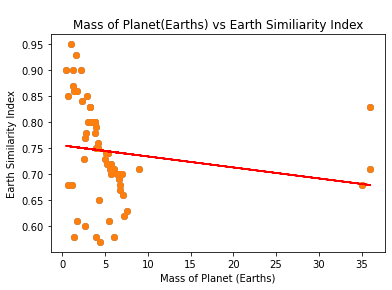

In [39]:
#Scatter Plot 2
x_values = dropped2['fpl_bmasse']
y_values = dropped2['ESI']
plt.scatter(x_values,y_values)
plt.xlabel('Mass of Planet (Earths)')
plt.ylabel('Earth Similarity Index')
plt.title('Mass of Planet(Earths) vs Earth Similiarity Index')
plot_linear(x_values, y_values,'Max Temp',(1, 1))

In [40]:
#Defined the T Test variables for the sample 
ttest = nasa_filter_df[nasa_filter_df['fpl_name'].isin(phl_names)]
ttest_clean = ttest.dropna(subset = ['fpl_eqt'])
ttest_mean = ttest_clean['fpl_eqt']

#Defined the T test variables for the entire population
ttesto = nasa_filter_df
ttesto_clean = ttesto.dropna(subset = ['fpl_eqt'])
ttesto_mean = ttesto_clean['fpl_eqt'].mean()
#Ran the T Test
stats.ttest_1samp(ttest_mean, ttesto_mean)

Ttest_1sampResult(statistic=-126.80781328613818, pvalue=2.341821736101518e-41)

In [41]:
#T Test 2
ttest1_clean = ttest.dropna(subset = ['fpl_insol'])
ttest1_mean = ttest1_clean['fpl_insol']

ttesto1_clean = ttesto.dropna(subset = ['fpl_insol'])
ttesto1_mean = ttesto1_clean['fpl_insol'].mean()

stats.ttest_1samp(ttest1_mean, ttesto1_mean)

Ttest_1sampResult(statistic=-2807.3974514967686, pvalue=4.893218605265336e-122)

In [42]:
#T Test 3
ttest2_clean = ttest.dropna(subset = ['fpl_bmasse'])
ttest2_mean = ttest2_clean['fpl_bmasse']

ttesto2_clean = ttesto.dropna(subset = ['fpl_insol'])
ttesto2_mean = ttesto2_clean['fpl_insol'].mean()

stats.ttest_1samp(ttest2_mean, ttesto2_mean)

Ttest_1sampResult(statistic=-375.87220976600395, pvalue=6.314662785997406e-100)

In [43]:
#T Test 4
ttest3_clean = ttest.dropna(subset = ['fpl_rade'])
ttest3_mean = ttest3_clean['fpl_rade']

ttesto3_clean = ttesto.dropna(subset = ['fpl_rade'])
ttesto3_mean = ttesto3_clean['fpl_rade'].mean()

stats.ttest_1samp(ttest3_mean, ttesto3_mean)

Ttest_1sampResult(statistic=-57.06395588587799, pvalue=1.1752410897839319e-52)

In [44]:
#T Test 5
ttest4_clean = ttest.dropna(subset = ['fst_optmag'])
ttest4_mean = ttest4_clean['fst_optmag']

ttesto4_clean = ttesto.dropna(subset = ['fst_optmag'])
ttesto4_mean = ttesto4_clean['fst_optmag'].mean()

stats.ttest_1samp(ttest4_mean, ttesto4_mean)

Ttest_1sampResult(statistic=2.4539188973045363, pvalue=0.017155121531268386)

In [45]:
# T Test 6
ttest5_clean = ttest.dropna(subset = ['fst_age'])
ttest5_mean = ttest5_clean['fst_age']

ttesto5_clean = ttesto.dropna(subset = ['fst_age'])
ttesto5_mean = ttesto5_clean['fst_age'].mean()

stats.ttest_1samp(ttest5_mean, ttesto5_mean)

Ttest_1sampResult(statistic=-0.7601683160728409, pvalue=0.45095055880361734)